In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/train.csv')
df.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


## Distributions

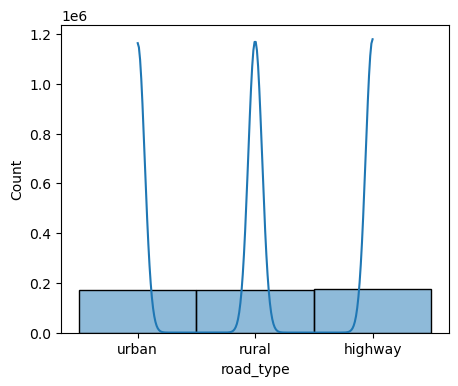

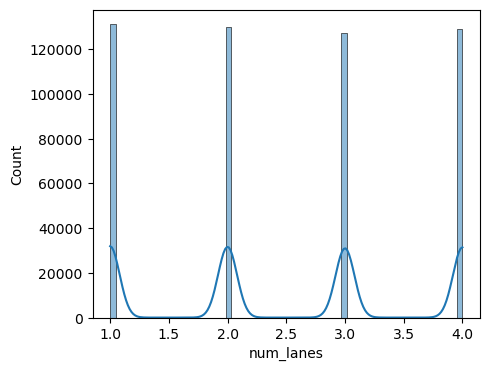

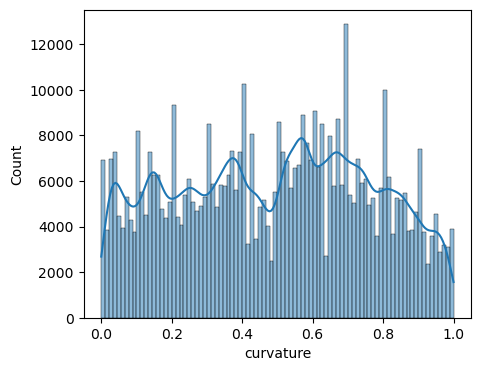

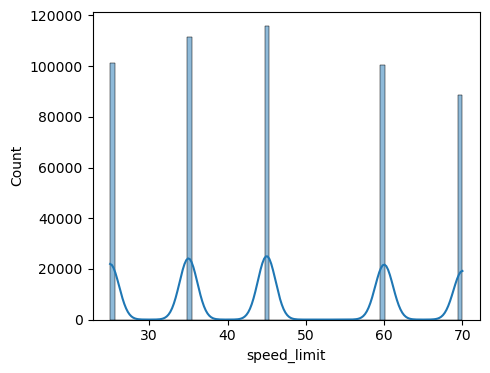

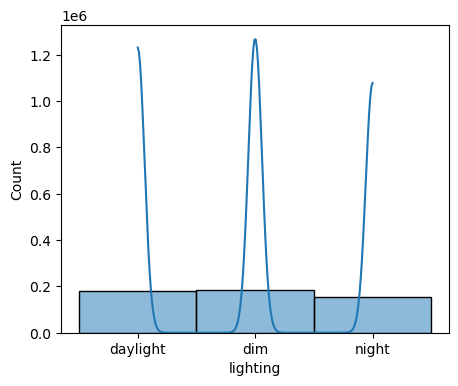

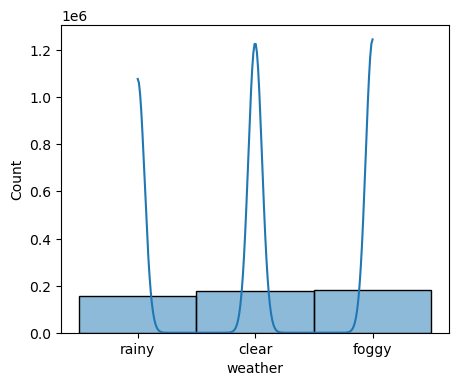

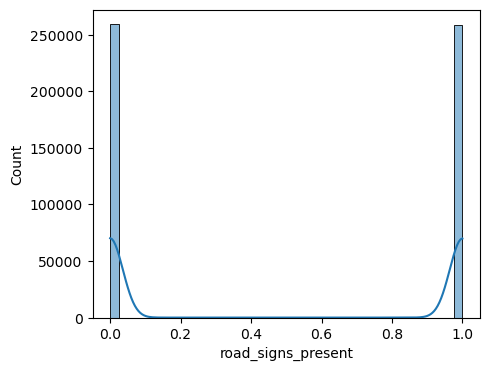

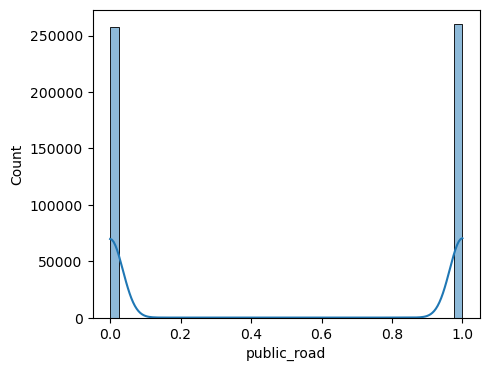

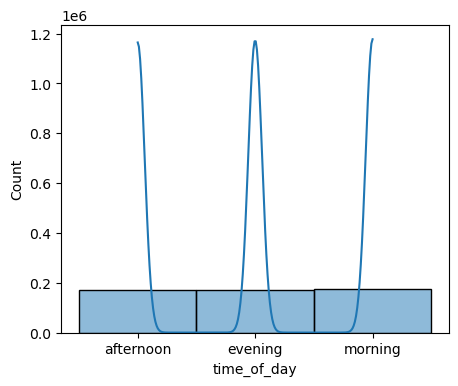

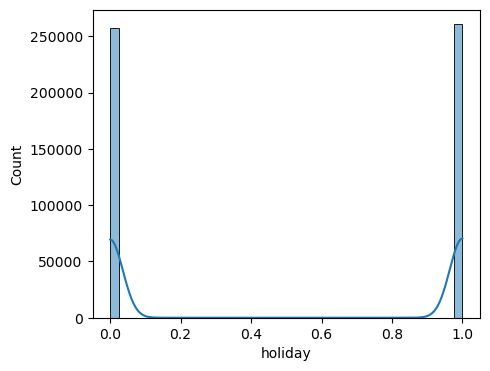

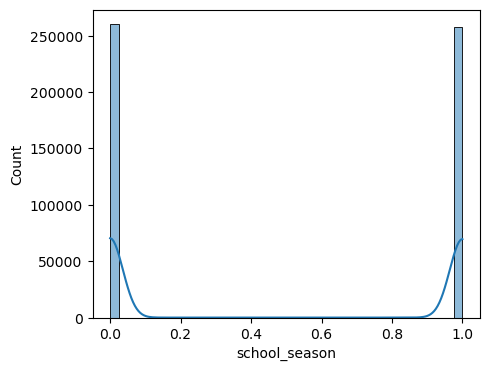

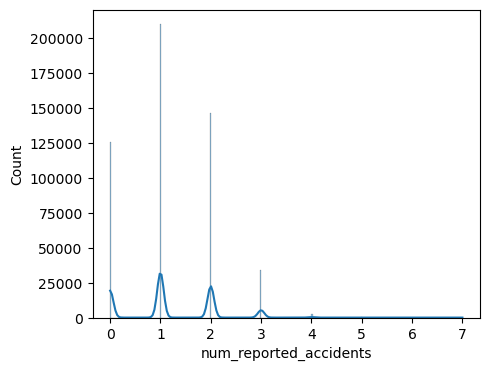

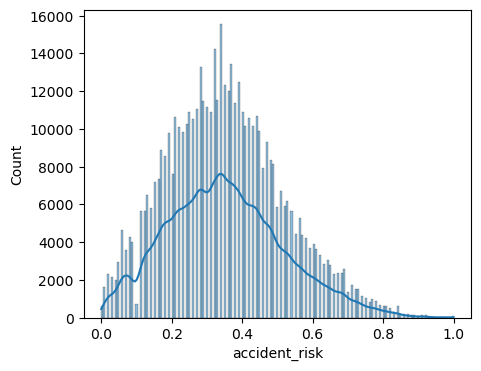

In [55]:
# Drop the id
df_columns = df.columns[1:]

for col in df_columns:
    fig = plt.figure(figsize=(5, 4))
    sns.histplot(df[col], kde=True)

## Some Data

In [68]:
df.describe()

,id,num_lanes,curvature,speed_limit,num_reported_accidents,accident_risk
count,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000
mean,258876.500000,2.491511,0.488719,46.112575,1.187970,0.352377
std,149462.849974,1.120434,0.272563,15.788521,0.895961,0.166417
min,0.000000,1.000000,0.000000,25.000000,0.000000,0.000000
25%,129438.250000,1.000000,0.260000,35.000000,1.000000,0.230000
50%,258876.500000,2.000000,0.510000,45.000000,1.000000,0.340000
75%,388314.750000,3.000000,0.710000,60.000000,2.000000,0.460000
max,517753.000000,4.000000,1.000000,70.000000,7.000000,1.000000


## By Accident risk

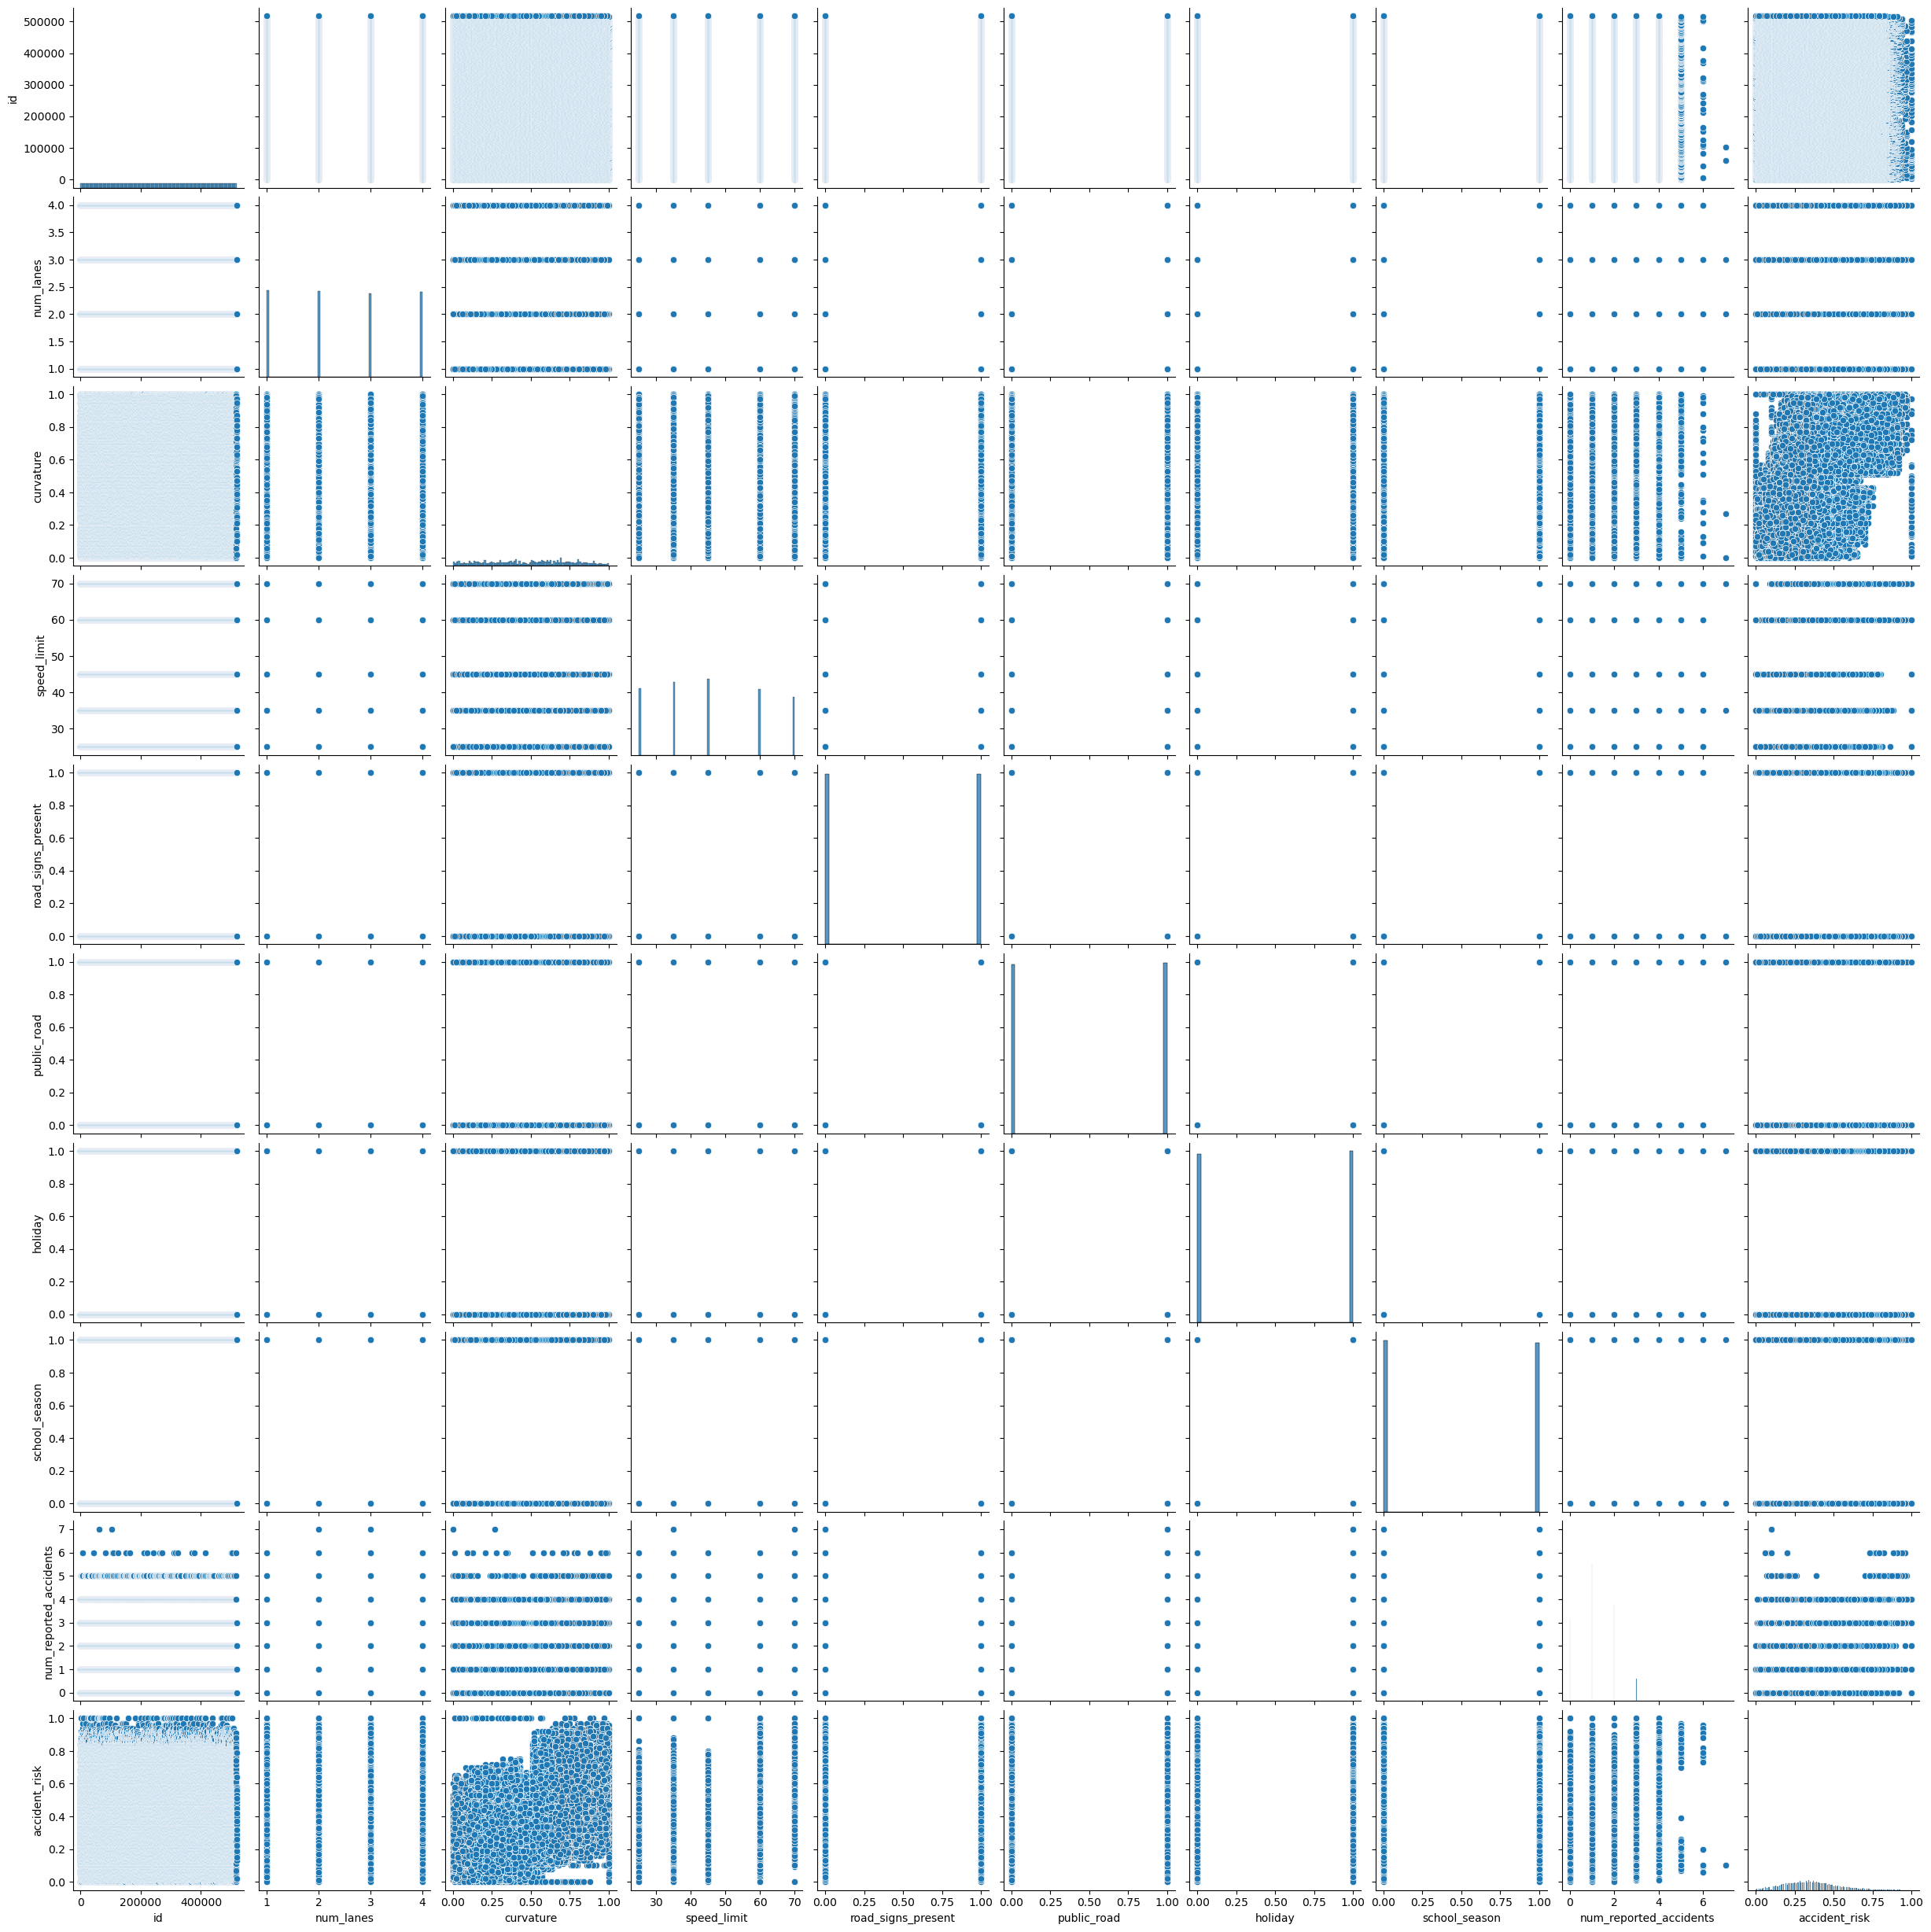

In [73]:
sns.pairplot(df)

### Statistical Test based on groups in accident risk

#### num_lanes, speed_limit, road_signs_present, public_road, holdiay, school_season, num_reported_accidents

In [80]:
from scipy.stats import f_oneway

In [110]:
categorical_columns = ["num_lanes", "speed_limit", "road_signs_present", "public_road", "holiday", "school_season", "num_reported_accidents"]

for cat_col in categorical_columns:
    groups = [group['accident_risk'].values for name, group in df.groupby(cat_col)]

    stat, p_val = f_oneway(*groups)

    significant =  False
    if p_val > 0.05:
        significant = True
    
    print(f"{cat_col}, stat: {stat}, p_val: {p_val}, {significant}")

num_lanes, stat: 84.52803318966357, p_val: 1.1323766788314247e-54, False
speed_limit, stat: 40625.05752161087, p_val: 0.0, False
road_signs_present, stat: 0.20508966818246813, p_val: 0.6506437914992536, True
public_road, stat: 499.0798864807869, p_val: 1.7005013477103197e-110, False
holiday, stat: 1357.0393131292487, p_val: 1.106762166758181e-296, False
school_season, stat: 0.4940959121905484, p_val: 0.48210619492574447, True
num_reported_accidents, stat: 10314.793432807255, p_val: 0.0, False


road_signs_present and school_season doesn't effect on accident_risk that much!

### Heatmap

<Axes: >

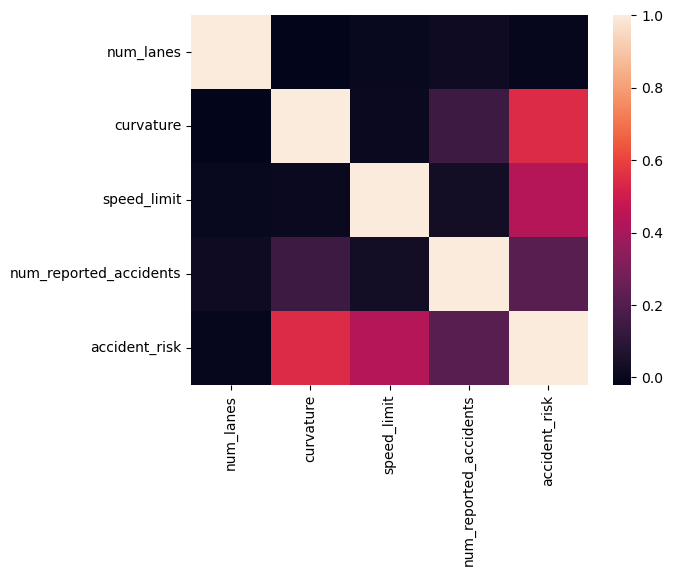

In [131]:
sns.heatmap(df.drop('id', axis=1).select_dtypes(['float', 'int']).corr())